In [1]:
# libraries to display dataframe and images
from IPython.display import display
from PIL import Image
# matplotlib for vizualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# inbuild library to work with textual data
import string
# Setting up the NLTK to pre-processing textual data
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('universal_tagset')
nltk.download('treebank')

sns.set_theme(style="darkgrid")
pd.set_option("display.max_columns", 100)
%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/leenasingh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/leenasingh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/leenasingh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/leenasingh/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package tagsets to
[nltk_data]     /Users/leenasingh/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/leenasingh/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package treebank to
[nltk_data]     /Users/leenasingh/nltk_data...
[nltk_data]   Unzippin

In [4]:
import numpy as np
import pandas as pd
import spacy
spacy.load('en_core_web_sm')
from spacy import displacy

# reading the csv data file
articles = pd.read_csv("medium_articles_v3.csv")
display(articles.head(10))
print("Shape of dataframe : {}".format(articles.shape))

,link,title,sub_title,author,reading_time,text,id
0,https://towardsdatascience.com/ensemble-method...,"Ensemble methods: bagging, boosting and stacking",Understanding the key concepts of ensemble lea...,Joseph Rocca,20,This post was co-written with Baptiste Rocca.\...,1
1,https://towardsdatascience.com/understanding-a...,Understanding AUC - ROC Curve,"In Machine Learning, performance measurement i...",Sarang Narkhede,5,"In Machine Learning, performance measurement i...",2
2,https://towardsdatascience.com/how-to-work-wit...,How to work with object detection datasets in ...,"A comprehensive guide to defining, loading, ex...",Eric Hofesmann,10,Microsoft's Common Objects in Context dataset ...,3
3,https://towardsdatascience.com/11-dimensionali...,11 Dimensionality reduction techniques you sho...,Reduce the size of your dataset while keeping ...,Rukshan Pramoditha,16,"In both Statistics and Machine Learning, the n...",4
4,https://towardsdatascience.com/the-time-series...,The Time Series Transformer,Attention Is All You Need they said. Is it a m...,Theodoros Ntakouris,6,Attention Is All You Need they said. Is it a m...,5
5,https://netflixtechblog.com/learning-a-persona...,Learning a Personalized Homepage,how to best tailor each member's homepage to m...,Netflix Technology Blog,15,by Chris Alvino and Justin Basilico\nAs we've ...,6
6,https://towardsdatascience.com/6-data-science-...,6 Data Science Certificates To Level Up Your C...,Pump up your portfolio and get closer to your ...,Sara A. Metwalli,6,Because of the appeal of the field of data sci...,7
7,https://towardsdatascience.com/transformers-ex...,Transformers Explained Visually (Part 2): How ...,A Gentle Guide to the Transformer under the ho...,Ketan Doshi,11,This is the second article in my series on Tra...,8
8,https://medium.com/coders-camp/60-python-proje...,60 Python Projects with Source Code,60 Python Projects with Source code solved and...,Aman Kharwal,2,Python has been in the top 10 popular programm...,9
9,https://towardsdatascience.com/geometric-found...,Geometric foundations of Deep Learning,Geometric Deep Learning is an attempt to unify...,Michael Bronstein,13,This blog post was co-authored with Joan Bruna...,10


Shape of dataframe : (208, 7)


In [10]:
from pprint import pprint

pprint(articles.iloc[1].to_dict(), compact=True)

{'author': 'Sarang Narkhede',
 'id': 2,
 'link': 'https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5?source=tag_archive---------1-----------------------',
 'reading_time': 5,
 'sub_title': 'In Machine Learning, performance measurement is an essential '
              'task. So when it comes to a classification problem, we can '
              'count on an AUC - ROC Curve. When we need to check or visualize '
              'the performance...',
 'text': 'In Machine Learning, performance measurement is an essential task. '
         'So when it comes to a classification problem, we can count on an AUC '
         '- ROC Curve. When we need to check or visualize the performance of '
         'the multi-class classification problem, we use the AUC (Area Under '
         'The Curve) ROC (Receiver Operating Characteristics) curve. It is one '
         'of the most important evaluation metrics for checking any '
         "classification model's performance. It is also written

In [11]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   link          208 non-null    object
 1   title         208 non-null    object
 2   sub_title     208 non-null    object
 3   author        208 non-null    object
 4   reading_time  208 non-null    int64 
 5   text          208 non-null    object
 6   id            208 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 11.5+ KB


In [14]:
articles.describe(include='all')

,link,title,sub_title,author,reading_time,text,id
count,208,208,208,208,208.000000,208,208.000000
unique,208,208,204,179,NaN,208,NaN
top,https://towardsdatascience.com/ensemble-method...,"Ensemble methods: bagging, boosting and stacking",Update: This article is part of a series. Chec...,Adam Geitgey,NaN,This post was co-written with Baptiste Rocca.\...,NaN
freq,1,1,4,5,NaN,1,NaN
mean,NaN,NaN,NaN,NaN,12.375000,NaN,107.091346
std,NaN,NaN,NaN,NaN,13.880224,NaN,62.575453
min,NaN,NaN,NaN,NaN,2.000000,NaN,1.000000
25%,NaN,NaN,NaN,NaN,6.000000,NaN,52.750000
50%,NaN,NaN,NaN,NaN,9.000000,NaN,107.500000
75%,NaN,NaN,NaN,NaN,13.000000,NaN,162.250000


/Users/leenasingh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


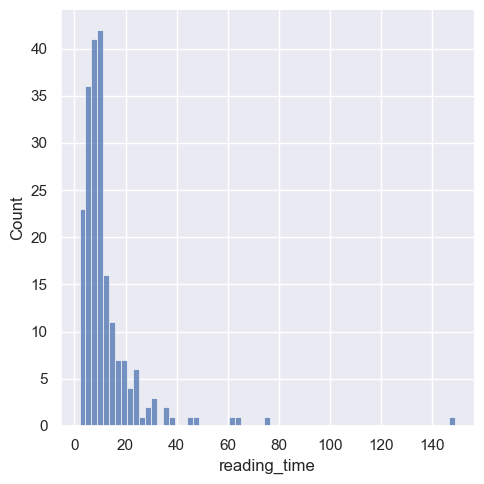

In [17]:
sns.displot(articles['reading_time'])

Correlation Coefficient: 0.96


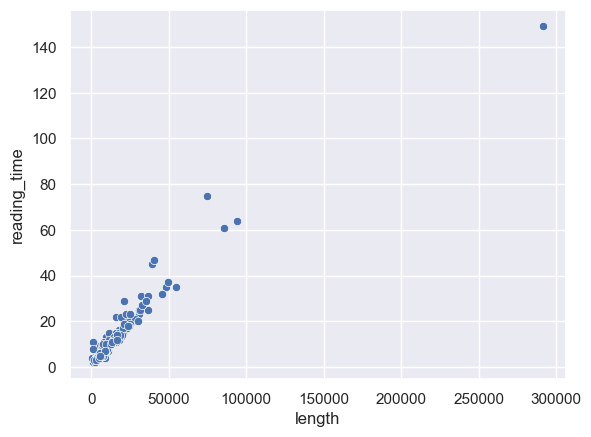

In [28]:
#How does reading time relates with article length?

articles['length']=articles['text'].apply(lambda x: len(x))

sns.scatterplot(data=articles,x='length',y='reading_time')
print('Correlation Coefficient:',round(np.corrcoef(articles['length'],articles['reading_time'])[0,1],2))

Reading increases as length of the article increases which is pretty logical.

In [35]:
articles.sort_values(by='author')[['author','title']]

,author,title
43,Abhay Pawar,Machine learning models for 100% better return...
30,Adam Geitgey,Machine Learning is Fun! Part 4: Modern Face R...
86,Adam Geitgey,Machine Learning is Fun! Part 2
101,Adam Geitgey,Machine Learning is Fun Part 6: How to do Spee...
33,Adam Geitgey,Machine Learning is Fun! Part 3: Deep Learning...
...,...,...
151,Yueh,2018 & : KOKO COMBO icash
105,allen farrington,Bitcoin Is Venice
139,allen farrington,Gauge Theory Does Not Fix This
91,sunil kumar,Advantages and Disadvantages of Artificial Int...


In [37]:
import contractions

In [39]:
contractions.fix("She'd like to know how I'd done that! She's going to the park and I don't think I'll be home for dinner.Theyre going to the zoo and she'll be home for dinner")

'She would like to know how I would done that! She is going to the park and I do not think I will be home for dinner.They Are going to the zoo and she will be home for dinner'

In [41]:
articles['text']=articles['text'].apply(lambda x: contractions.fix(x)) 

In [52]:
corpus = [
    "it was the best of times",
    "it was the worst of times",
    "it was the age of wisdom and the age of foolishness"
]

features=[]

for sent in corpus:
    features+=sent.split()
    
features=set(features)

In [65]:
vocab=set(" ".join(corpus).lower().split(' '))

bow=[]

for sent in corpus:
    d=dict([(v,0) for v in vocab])
    for word in word_tokenize(sent.lower()):
        d[word]+=1
    bow.append(d)

pd.DataFrame(bow,index=corpus)
    
        

,the,best,age,times,and,it,wisdom,was,of,foolishness,worst
it was the best of times,1,1,0,1,0,1,0,1,1,0,0
it was the worst of times,1,0,0,1,0,1,0,1,1,0,1
it was the age of wisdom and the age of foolishness,2,0,2,0,1,1,1,1,2,1,0


In [68]:
pd.DataFrame([{'it':2,'was':7},{'it':5,'was': 8}])

,it,was
0,2,7
1,5,8


In [67]:
bow

[{'the': 1,
  'best': 1,
  'age': 0,
  'times': 1,
  'and': 0,
  'it': 1,
  'wisdom': 0,
  'was': 1,
  'of': 1,
  'foolishness': 0,
  'worst': 0},
 {'the': 1,
  'best': 0,
  'age': 0,
  'times': 1,
  'and': 0,
  'it': 1,
  'wisdom': 0,
  'was': 1,
  'of': 1,
  'foolishness': 0,
  'worst': 1},
 {'the': 2,
  'best': 0,
  'age': 2,
  'times': 0,
  'and': 1,
  'it': 1,
  'wisdom': 1,
  'was': 1,
  'of': 2,
  'foolishness': 1,
  'worst': 0}]

In [132]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

cv = CountVectorizer()
bow_rep = cv.fit_transform(corpus).todense()
bow_rep
pd.DataFrame(data=bow,columns=cv.get_feature_names_out())

,age,and,best,foolishness,it,of,the,times,was,wisdom,worst
0,0.000000,0.000000,0.166667,0.000000,0.166667,0.166667,0.166667,0.166667,0.166667,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.166667,0.166667,0.166667,0.166667,0.166667,0.000000,0.166667
2,0.181818,0.090909,0.000000,0.090909,0.090909,0.181818,0.181818,0.000000,0.090909,0.090909,0.000000


In [130]:
#Term Frequency

corpus = [
    "it was the best of times",
    "it was the worst of times",
    "it was the age of wisdom and the age of foolishness"
]


vocab=set(" ".join(corpus).lower().split(' '))

bow=[]

for sent in corpus:
    len_doc=0
    d=dict([(v,0) for v in vocab])
    for word in word_tokenize(sent.lower()):
        d[word]+=1
        len_doc+=1
    for key,values in d.items():
        d[key]=d[key]/len_doc
    bow.append(d)

df=pd.DataFrame(bow,index=corpus)
df

,the,best,age,times,and,it,wisdom,was,of,foolishness,worst
it was the best of times,0.166667,0.166667,0.000000,0.166667,0.000000,0.166667,0.000000,0.166667,0.166667,0.000000,0.000000
it was the worst of times,0.166667,0.000000,0.000000,0.166667,0.000000,0.166667,0.000000,0.166667,0.166667,0.000000,0.166667
it was the age of wisdom and the age of foolishness,0.181818,0.000000,0.181818,0.000000,0.090909,0.090909,0.090909,0.090909,0.181818,0.090909,0.000000


In [129]:
#Calculating Inverse Document Frequency

len_corpus=len(corpus)

len_words_corpus=[len(word_tokenize(x)) for x in corpus]

num_docs=dict((v,0) for v in vocab)

for word in vocab:
    for sent in corpus:
        if word in word_tokenize(sent):
            num_docs[word]+=1
for key,value in num_docs.items():
    num_docs[key]=np.log((len_corpus)/value)
num_docs

{'the': 0.0,
 'best': 1.0986122886681098,
 'age': 1.0986122886681098,
 'times': 0.4054651081081644,
 'and': 1.0986122886681098,
 'it': 0.0,
 'wisdom': 1.0986122886681098,
 'was': 0.0,
 'of': 0.0,
 'foolishness': 1.0986122886681098,
 'worst': 1.0986122886681098}

In [131]:
for col in df.columns:
    df[col]=df[col]*num_docs[col]
df

,the,best,age,times,and,it,wisdom,was,of,foolishness,worst
it was the best of times,0.0,0.183102,0.000000,0.067578,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
it was the worst of times,0.0,0.000000,0.000000,0.067578,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.183102
it was the age of wisdom and the age of foolishness,0.0,0.000000,0.199748,0.000000,0.099874,0.0,0.099874,0.0,0.0,0.099874,0.000000


In [134]:


tf_idf_vectorizer = TfidfVectorizer()
tf_idf_rep = tf_idf_vectorizer.fit_transform(corpus).todense()
df = pd.DataFrame(tf_idf_rep)
df.columns = tf_idf_vectorizer.get_feature_names_out()
df.index = corpus
display(df)

,age,and,best,foolishness,it,of,the,times,was,wisdom,worst
it was the best of times,0.000000,0.000000,0.579897,0.000000,0.342496,0.342496,0.342496,0.441027,0.342496,0.000000,0.000000
it was the worst of times,0.000000,0.000000,0.000000,0.000000,0.342496,0.342496,0.342496,0.441027,0.342496,0.000000,0.579897
it was the age of wisdom and the age of foolishness,0.617558,0.308779,0.000000,0.308779,0.182370,0.364740,0.364740,0.000000,0.182370,0.308779,0.000000


In [137]:

import re


def process_sentence(sentence, nlp_object):
    # Convert to lowercase
    sentence = sentence.lower()

    # Exapnding contractions
    sentence = contractions.fix(sentence)

    # Lemmatization and removing stopwords
    doc = nlp_object(sentence)
    sentence = " ".join([token.lemma_ for token in doc if not token.is_stop])

    # Remove punctuation
    for p in string.punctuation:
        sentence = sentence.replace(p, " ")
    sentence = re.sub(r"\s+", " ", sentence) # Replace all whitespace characters with space

    return sentence










from tqdm.notebook import tqdm
# tqdm to see real time progress
tqdm.pandas()

nlp = spacy.load('en_core_web_sm') # English pipeline optimized for CPU

def process_article(article_text, nlp_object):
    processed_article_sentences = []
    # using nltk sentence tokenizer
    for sentence in sent_tokenize(article_text):
        # preprocessing each sentence using our process_sentence function
        processed_article_sentences.append(process_sentence(sentence, nlp_object))
    # joining preprocessed sentence as a complete paragrams of the article
    return " ".join(processed_article_sentences)

articles["processed_text"] = articles["text"].progress_apply(lambda x : process_article(x, nlp))









  0%|          | 0/208 [00:00<?, ?it/s]

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

In [146]:
nlp_object = spacy.load('en_core_web_sm')
doc = nlp_object("This is doing good")
for token in doc:
    print(token.lemma_)
    print(token.is_stop)

this
True
be
True
do
True
good
False


In [138]:
count_vectorizer = CountVectorizer(min_df=5)
# min_df: ignore terms that have a document frequency strictly lower than the given threshold.

# Learn the vocabulary dictionary and return document-term matrix
bow_features = count_vectorizer.fit_transform(articles["processed_text"]).todense() # todense() returns a matrix
# create dataframe
bow_features_df = pd.DataFrame(bow_features)
bow_features_df.columns = count_vectorizer.get_feature_names_out() # Get output feature names for dataframe columns.
bow_features_df["TITLE"] = articles["title"]
bow_features_df["ID"] = articles["id"]
display(bow_features_df)

,00,000,01,05,06,07,10,100,1000,101,10k,10x,11,12,120,125,128,13,14,15,150,16,17,18,19,1980,1989,1990,1k,1st,20,200,2000,2001,2005,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,21,...,wise,wish,withdraw,woman,wonder,wonderful,wood,word,work,worker,workflow,working,workout,world,worried,worry,worse,worsen,worth,wow,wrap,write,writer,writing,wrong,www,xgboost,xi,yeah,year,yearly,yell,yellow,yes,yesterday,yield,yo,york,you,young,youtube,zero,zhou,zip,zombie,zone,zoom,zuckerberg,TITLE,ID
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Ensemble methods: bagging, boosting and stacking",1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Understanding AUC - ROC Curve,2
2,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,How to work with object detection datasets in ...,3
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0,0,0,0,3,0,1,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,11 Dimensionality reduction techniques you sho...,4
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,The Time Series Transformer,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,3,0,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,Type 2 Diabetes Reversal The Quick Start Guide,210
204,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,2,0,0,How a 22 Day Water Fast Changed My Life,211
205,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Breaking Your Fast,212
206,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10,0,0,0,0,1,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,11 Unusual Tips for How to Wake Up Early,213


In [162]:
from sklearn.metrics.pairwise import cosine_similarity


this_article_rep = bow_features_df[bow_features_df["ID"] == 90][count_vectorizer.get_feature_names_out()]
other_article_rep = bow_features_df[bow_features_df["ID"] != 90][count_vectorizer.get_feature_names_out()]
# # calculating cosine similarity
# similarity_matrix = cosine_similarity(this_article_rep, other_article_rep)
# similar_articles = list(zip(similarity_matrix[0].tolist(), bow_features_df["TITLE"].tolist()))
# # sorting
# similar_articles = sorted(similar_articles, key = lambda x : x[0], reverse = True)
# print("Reference Article : {}".format(bow_features_df[bow_features_df["ID"] == 90]["TITLE"].values[0]))

# print("**** Similar Articles ****")
# # top 5 similar articles
# for score, title in similar_articles[:5]:
#     print(title)

for i in zip(list(cosine_similarity(this_article_rep, other_article_rep)[0]),bow_features_df['TITLE'].to_list()):
    print(i)

(0.19183061351511443, 'Ensemble methods: bagging, boosting and stacking')
(0.139743182099794, 'Understanding AUC - ROC Curve')
(0.24147810306337553, 'How to work with object detection datasets in COCO format')
(0.3231644563297632, '11 Dimensionality reduction techniques you should know in 2021')
(0.2391939763550009, 'The Time Series Transformer')
(0.14240399288128341, 'Learning a Personalized Homepage')
(0.17929542291345354, '6 Data Science Certificates To Level Up Your Career')
(0.15112497039746464, 'Transformers Explained Visually (Part 2): How it works, step-by-step')
(0.06270092677357267, '60 Python Projects with Source Code')
(0.20096989123688136, 'Geometric foundations of Deep Learning')
(0.4469151502471941, 'Machine Learning Basics with the K-Nearest Neighbors Algorithm')
(0.32165088901715555, 'Building RNN, LSTM, and GRU for time series using PyTorch')
(0.1521678591949164, 'Algorithms of the Mind')
(0.23028981880582775, '4 Reasons Why Economists Make Great Data Scientists (And 

In [164]:
bow_features_df['TITLE']

0       Ensemble methods: bagging, boosting and stacking
1                          Understanding AUC - ROC Curve
2      How to work with object detection datasets in ...
3      11 Dimensionality reduction techniques you sho...
4                            The Time Series Transformer
                             ...                        
203      Type 2 Diabetes Reversal  The Quick Start Guide
204              How a 22 Day Water Fast Changed My Life
205                                   Breaking Your Fast
206             11 Unusual Tips for How to Wake Up Early
207    The 3 Biggest Mistakes Women Make On The Ketog...
Name: TITLE, Length: 208, dtype: object

In [167]:
len(cosine_similarity(this_article_rep, other_article_rep)[0])

207